# Una tipología de manejo agrícola para los municipios de México

**Irene Ramos Pérez**

mayo 2019

Como parte de mi tesis de maestría desarrollé una tipología de manejo agrícola para los municipios de México que agrupa a los municipios de acuerdo a su similitud en prácticas de manejo y, por tanto, también me permite distinguir aquellos con manejos contrastantes. Aquí documento la construcción de esta tipología a partir de datos de INEGI.

## Datos

Se utilizarán datos del Censo Agrícola, Ganadero y Forestal 2007 (INEGI), a nivel municipal, que corresponden a alrededor de 2400 municipios. En particular se considerarán las siguientes variables (todas son de tipo numérico, continuas):

* **Uso de suelo.** Porcentaje de la superficie del municipio dedicada a 1) labor agrícola y 2) bosque o selva. 
* **Tipo de tracción.** Porcentaje de las unidades de producción del municipio que emplean sólo tracción mecánica para realizar las labores agrícolas.
* **Origen del agua.** Porcentaje de la superficie agrícola del municipio en la que se practica agricultura de temporal.
* **Insumos.** Porcentaje de la superficie agrícola del municipio que emplea 1) herbicidas químicos y 2) insecticidas químicos.

Previamente se estandarizó el formato de los datos, se quitaron valores nulos y se integraron las variables a utilizar en un mismo archivo `datos.csv`.

In [1]:
# librerías a utilizar
import pandas, numpy, seaborn
from matplotlib import pyplot

In [2]:
# leer los datos
datos = pandas.read_csv('./Tipologia/datos.csv', encoding ='ISO-8859-1')
datos = datos.set_index('Clave')

In [3]:
datos[['Entidad y municipio', 'Entidad', '% Temporal', '% Mecánica', 
       '% labor agricola', '% bosque', '% Herbicidas químicos', 
       '% Insecticidas químicos']].head()

,Entidad y municipio,Entidad,% Temporal,% Mecánica,% labor agricola,% bosque,% Herbicidas químicos,% Insecticidas químicos
Clave,,,,,,,,
01_001,AGUASCALIENTES,AGUASCALIENTES,75.123727,83.413297,52.676031,0.044765,20.376084,6.765960
01_002,ASIENTOS,AGUASCALIENTES,77.939970,79.576299,80.546052,0.101570,12.520469,4.501609
01_003,CALVILLO,AGUASCALIENTES,59.930021,38.037634,24.321383,0.650017,14.951300,7.547488
01_004,COSÍO,AGUASCALIENTES,47.511173,91.229743,77.868016,0.025051,19.282536,7.912925
01_005,JESÚS MARÍA,AGUASCALIENTES,72.548701,80.868167,33.136668,0.362998,33.637145,7.005523


## Gráficas

Las siguientes gráficas de dispersión muestran un panorama general de la distribución de las variables por estado (donde cada punto representa un municipio).

In [4]:
# formato general de las gráficas
%matplotlib inline
seaborn.set_style('whitegrid')
pyplot.rcParams['axes.labelsize'] = 14
pyplot.rcParams['ytick.labelsize'] = 12

# etiquetas paras las gráficas
estados = ['AGU', 'BCN', 'BCS', 'CAM', 'COA',
           'COL', 'CHP', 'CHH','CMX', 'DUR',
          'GUA', 'GRO', 'HID', 'JAL', 'MEX',
          'MIC', 'MOR', 'NAY', 'NLE', 'OAX',
          'PUE', 'QUE', 'ROO', 'SLP', 'SIN',
          'SON', 'TAB', 'TAM', 'TLA', 'VER', 
           'YUC', 'ZAC']

### Riego

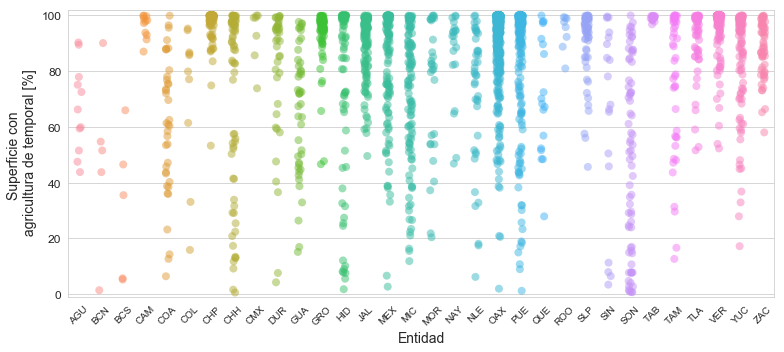

In [5]:
pyplot.figure(figsize=(11, 5))
seaborn.stripplot(x='Entidad', y='% Temporal', data=datos, jitter=True, 
                  alpha=0.5, s=8)
locs = pyplot.xticks()[0]
pyplot.xticks(locs, estados, rotation=45)
pyplot.ylim(-1, 102)
pyplot.ylabel('Superficie con \n agricultura de temporal [%]')
pyplot.tight_layout()

### Insumos

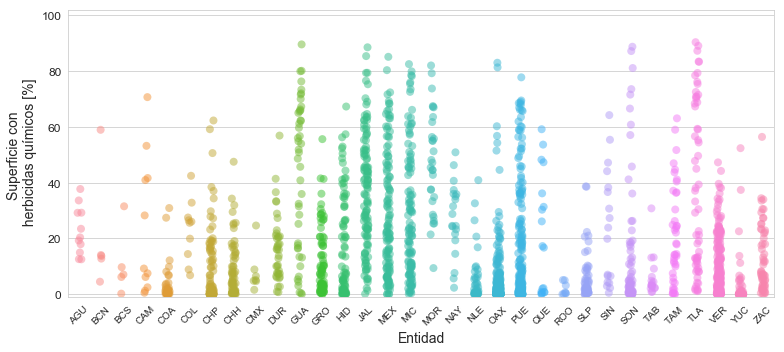

In [6]:
pyplot.figure(figsize=(11, 5))
seaborn.stripplot(x='Entidad', y='% Herbicidas químicos', data=datos, 
                  jitter=True, alpha=0.5, s=8)
locs = pyplot.xticks()[0]
pyplot.xticks(locs, estados, rotation=45)
pyplot.ylim(-1, 102)
pyplot.ylabel('Superficie con \n herbicidas químicos [%]')
pyplot.tight_layout()

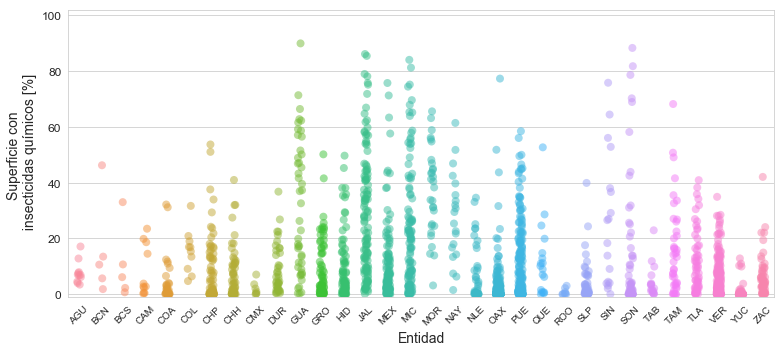

In [7]:
pyplot.figure(figsize=(11, 5))
seaborn.stripplot(x='Entidad', y='% Insecticidas químicos', data=datos, 
                  jitter=True, alpha=0.5, s=8)
locs = pyplot.xticks()[0]
pyplot.xticks(locs, estados, rotation=45)
pyplot.ylim(-1, 102)
pyplot.ylabel('Superficie con \n insecticidas químicos [%]')
pyplot.tight_layout()

### Uso de suelo

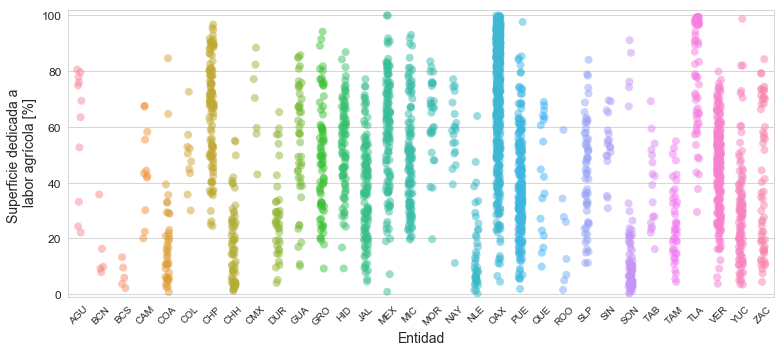

In [8]:
pyplot.figure(figsize=(11, 5))
seaborn.stripplot(x='Entidad', y='% labor agricola', data=datos, 
                  jitter=True, alpha=0.5, s=8)
locs = pyplot.xticks()[0]
pyplot.xticks(locs, estados, rotation=45)
pyplot.ylim(-1, 102)
pyplot.ylabel('Superficie dedicada a \n labor agrícola [%]')
pyplot.tight_layout()

### Tracción

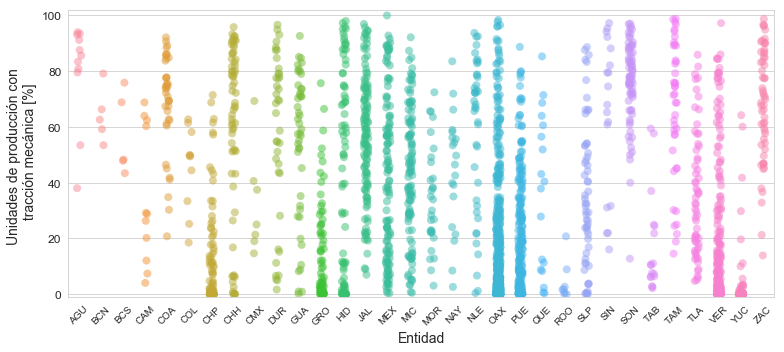

In [9]:
pyplot.figure(figsize=(11, 5))
seaborn.stripplot(x='Entidad', y='% Mecánica', data=datos, 
                  jitter=True, alpha=0.5, s=8)
locs = pyplot.xticks()[0]
pyplot.xticks(locs, estados, rotation=45)
pyplot.ylim(-1, 102)
pyplot.ylabel('Unidades de producción con \n tracción mecánica [%]')
pyplot.tight_layout()

## Tipología

Se realizó un análisis de componentes principales para identificar las variables que permitieran distinguir la mayor variación entre los municipios y posteriormente se realizó un agrupamiento de los municipios con el algoritmo k-means (https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html). 

### Análisis de componentes principales

In [10]:
# funciones
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [11]:
# definir semilla para la reproducibilidad de los resultados
numpy.random.seed(170)

In [12]:
# análisis de componentes principales
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(datos[['% Temporal', '% Mecánica', 
                                        '% labor agricola', '% bosque',
                                        '% Herbicidas químicos', 
                                        '% Insecticidas químicos']])

In [13]:
componentes = pandas.DataFrame(pca.components_.T, index=['% Temporal', '% Mecánica', 
                                                         '% labor agricola', '% bosque',
                                                         '% Herbicidas químicos', 
                                                         '% Insecticidas químicos'])
componentes

,0,1
% Temporal,-0.388399,-0.028287
% Mecánica,0.781127,0.074427
% labor agricola,-0.268198,0.900715
% bosque,-0.002422,-0.057708
% Herbicidas químicos,0.325058,0.357280
% Insecticidas químicos,0.247768,0.226704


In [14]:
# varianza explicada por cada componente
pca.explained_variance_ratio_

array([0.48645058, 0.24418356])

Se eligieron dos componentes para el PCA. Se encontró que el primero está asociado con las variables `Agricultura de temporal` y `Tracción mecánica`; en cambio, el segundo está asociado principalmente con la variable `Área de labor agrícola`. La varianza explicada por estos componentes es del 49% y 24%, respectivamente.

### Agrupamiento con k-means

Se eligió un parámetro de `k=4` para el agrupamiento de los datos, esto es el número de grupos en los que se quiere agrupar los datos. Con este valor los datos se agrupan en cuadrantes que representan manejos contrastantes, pero como se trata de un parámetro arbitrario se pueden explorar otros agrupamientos. 

In [15]:
# agrupamiento con k-means
kmeans = KMeans(n_clusters = 4)
kmeans.fit(reduced_data)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

En la siguiente gráfica se muestran los datos reducidos por el PCA y agrupados con el algoritmo de k-means. El *eje x* representa el PC1, es decir, en esta dimensión los valores cambian de gran porcentaje de tracción manual y agricultura de temporal hacia un mayor porcentaje de tracción mecánica y agricultura de riego. Entonces este eje puede interpretarse como un gradiente de intensificación de las actividades agrícolas. En cambio, el *eje y* representa el PC2, y aquí los valores cambian principalmente de poca a mucha superficie agrícola.

In [16]:
# definir los colores de la tipología
import matplotlib.colors

gold = matplotlib.colors.to_rgba('Gold')
green = matplotlib.colors.to_rgba('SeaGreen')
purple = matplotlib.colors.to_rgba('Indigo')
blue = matplotlib.colors.to_rgba('RoyalBlue')

mis_colores = matplotlib.colors.ListedColormap([gold, blue, purple, green],
                                               'mis_colores')

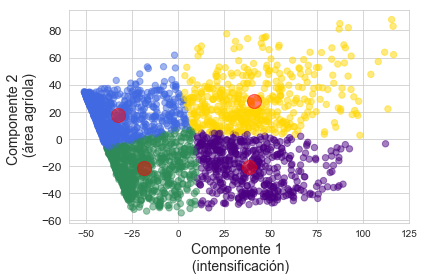

In [17]:
fig = pyplot.figure()
pyplot.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=40, 
               cmap=mis_colores, alpha=0.5, vmin = 0, vmax=3)
pyplot.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
pyplot.xlabel('Componente 1 \n (intensificación)')
pyplot.ylabel('Componente 2 \n (área agríola)')
pyplot.tight_layout()

In [18]:
# agregar las etiquetas y los valores de pca a la tabla de datos
datos['labels'] = labels
datos['pca1'] = reduced_data[:, 0]
datos['pca2'] = reduced_data[:, 1]

Por ejemplo, el municipio Peto, en Yucatán está ubicado en el cuadrante superior izquierdo (grupo azul) porque contiene un bajo porcentaje de tracción mecánica (1.5%), mucha superficie con agricultura de temporal (97%) y mucha superficie agrícola (70%):

In [19]:
datos.loc['31_058']

Entidad y municipio            PETO
Entidad                     YUCATÁN
% Mecánica                  1.51106
% Temporal                  98.6776
% Herbicidas químicos      0.835941
% Insecticidas químicos    0.562664
% labor agricola            70.5016
% bosque                      2.386
labels                            1
pca1                       -40.7867
pca2                        8.75305
Name: 31_058, dtype: object

**Nota:** las etiquetas de los cuadrantes que resultan del agrupamiento son:

 1  |  0
----|-----
 3  |  2

In [20]:
# guardar datos con la información del pca y el agrupamiento
# datos.to_csv('./tipologia.csv', encoding ='ISO-8859-1')

Las variables elegidas permitieron clasificar a los municipios de acuerdo a su similitud en prácticas de manejo agrícola. A partir de este agrupamiento se pueden seleccionar grupos de municipios que tengan manejos contrastantes, por ejemplo, municipios agrupados en esquinas opuestas del cuadrante o se pueden comparar de forma sistemática las prácticas de manejo entre municipios. 